In [14]:
# libs
from boruta import BorutaPy
import matplotlib.pyplot as plt
from pycaret.datasets import get_data
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV, f_classif, chi2

In [7]:
emails=pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/selected_emails.csv', index_col=0)
emails

,body,spam
0,"\n Hi Folks,\n \n I've been trying to set a bu...",0
1,Hah. I guess she doesn't want everyone to kno...,0
2,This article from NYTimes.com \n has been sent...,0
3,URL: http://boingboing.net/#85486499\n Date: N...,0
4,Hi.\n \n Dave Cridland <dave@cridland.net> wro...,0
...,...,...
995,Greetings! \n \n You are receiving this letter...,1
996,------=_NextPart_000_00A3_65E24E1C.A3468E63\n ...,1
997,"<html>\n <head>\n <meta http-equiv=""Conten...",1
998,<html>\n <head>\n </head>\n <body>\n \n <cente...,1


In [8]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = np.array([texts.str.contains(word) * 1 for word in words]).T

    # YOUR CODE HERE
    return indicator_array

In [11]:
words_list = ['please', 'click', 'money', 'business', 'remove']

X = pd.DataFrame(words_in_texts(words_list, emails['body'].str.lower())).values
y = emails['spam'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=41, test_size=0.2
)

#Fit the model
words_list_model = LogisticRegression(fit_intercept=True)
words_list_model.fit(X_train, y_train)

y_prediction_words_list = words_list_model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

words_list = ['please', 'click', 'money', 'business']

print(f'words_list_model test set accuracy: {np.round(accuracy_score(y_prediction_words_list, y_test), 3)}')

words_list_model test set accuracy: 0.96


In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)

words_list_model_y_pred = words_list_model.predict(X_train)

from sklearn.metrics import confusion_matrix

class_names = ['Spam', 'Not Spam']

## Confusion Matrix

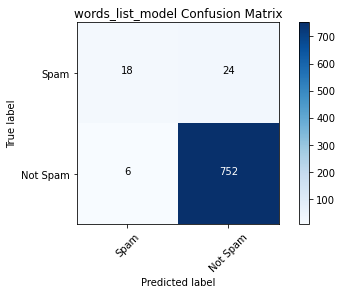

In [16]:
words_list_model_cnf_matrix = confusion_matrix(y_train, words_list_model_y_pred, labels=[1, 0])

plot_confusion_matrix(words_list_model_cnf_matrix, classes=class_names,
                      title='words_list_model Confusion Matrix')

### Precision/Sensitivity

$$ \text{Sensitivity} = \frac{TP}{TP+FN} $$

### Especificidade

$$ \text{Specificity} = \frac{TN}{TN + FP} $$ 

## ROC Curves

$$ \text{False Positive Rate } = 1 - \frac{TN}{TN + FP} = \frac{TN + FP - TN}{TN + FP} = \frac{FP}{TN + FP} $$

In [17]:
from sklearn.metrics import roc_curve

words_list_model_probabilities = words_list_model.predict_proba(X_train)[:, 1]
false_positive_rate_values, sensitivity_values, thresholds = roc_curve(y_train, words_list_model_probabilities, pos_label=1)


Text(0.5, 1.0, 'words_list_model ROC Curve')

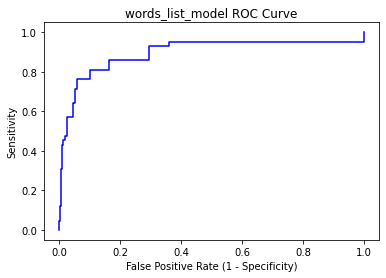

In [18]:
plt.step(false_positive_rate_values, sensitivity_values, color='b', where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('words_list_model ROC Curve')

Text(0.5, 1.0, 'Random Classifier ROC Curve')

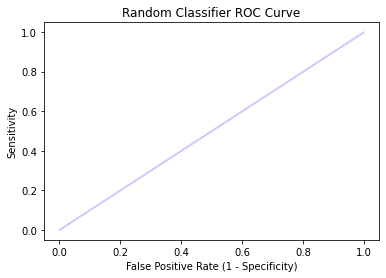

In [19]:
plt.step(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), color='b', alpha=0.2,
         where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('Random Classifier ROC Curve')

### AUC

Text(0.5, 1.0, 'words_list_model ROC Curve')

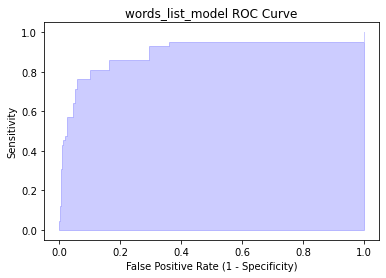

In [20]:
plt.fill_between(false_positive_rate_values, sensitivity_values, step='post', alpha=0.2,
                 color='b')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('words_list_model ROC Curve')

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, words_list_model_probabilities)

0.9183942706370146